In [2]:
import numpy as np
from astropy.io import fits
from glob import glob
import matplotlib.pyplot as plt

[7.7040531e+08 7.7040551e+08 7.7040571e+08 7.7040591e+08 7.7040611e+08
 7.7040631e+08 7.7040651e+08 7.7040671e+08 7.7040691e+08 7.7040711e+08
 7.7040731e+08 7.7040751e+08 7.7040771e+08 7.7040791e+08 7.7040811e+08
 7.7040831e+08 7.7040851e+08 7.7040871e+08 7.7040891e+08 7.7040911e+08
 7.7040931e+08 7.7040951e+08 7.7040971e+08 7.7040991e+08 7.7041011e+08
 7.7041031e+08 7.7041051e+08 7.7041071e+08 7.7041091e+08 7.7041111e+08
 7.7041131e+08 7.7041151e+08 7.7041171e+08 7.7041191e+08 7.7041211e+08
 7.7041231e+08 7.7041251e+08 7.7041271e+08 7.7041291e+08 7.7041311e+08
 7.7041331e+08 7.7041351e+08 7.7041371e+08 7.7041391e+08 7.7041411e+08
 7.7041431e+08 7.7041451e+08 7.7041471e+08 7.7041491e+08 7.7041511e+08
 7.7041531e+08 7.7041551e+08 7.7041571e+08 7.7041591e+08 7.7041611e+08
 7.7041631e+08 7.7041651e+08 7.7041671e+08 7.7041691e+08 7.7041711e+08
 7.7041731e+08 7.7041751e+08 7.7041771e+08 7.7041791e+08 7.7041811e+08
 7.7041831e+08 7.7041851e+08 7.7041871e+08 7.7041891e+08 7.7041911e+08
 7.704

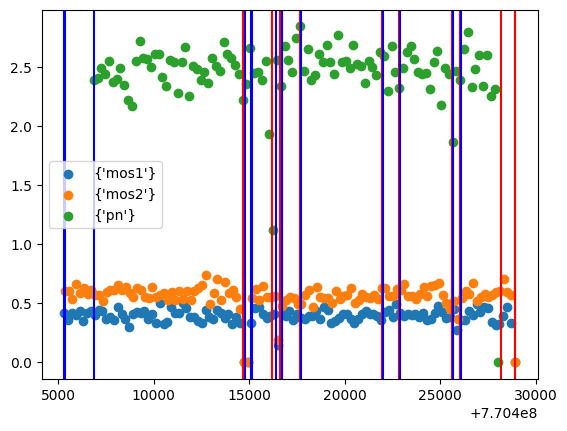

In [23]:


datapath = f'/Users/eusracenorth/Downloads'
for inst in ['mos1', 'mos2', 'pn']:
    # read lc
    lcfile = glob(f'{datapath}/{inst}*-fovlc.fits')[0]
    lc =  fits.open(lcfile)
    t_bins = np.arange(lc[1].data['TIME'].min(), lc[1].data['TIME'].max(), 200)
    print(t_bins)
    rates = np.zeros(len(t_bins))
    for i in range(len(t_bins)-1):
        rates[i] = np.sum(lc[1].data['RATE'][(lc[1].data['TIME']<=t_bins[i+1]) & (lc[1].data['TIME']>t_bins[i])])/200
    plt.scatter(t_bins, rates, label = {inst})
    # read gti
    gtifile = glob(f'{datapath}/{inst}*-gti.fits')[0]
    gti = fits.open(gtifile)
    for i in range(len(gti[1].data['START'])):
        plt.axvline(gti[1].data['START'][i], c ='b')
        plt.axvline(gti[1].data['STOP'][i], c = 'r')

plt.legend()